In [5]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt
bm.set_platform('cpu')
bp.__version__

'2.4.3.post5'

## 1. Train an RNN to generate a sequence  

Real time recurrent learning:  
see Example for models detail

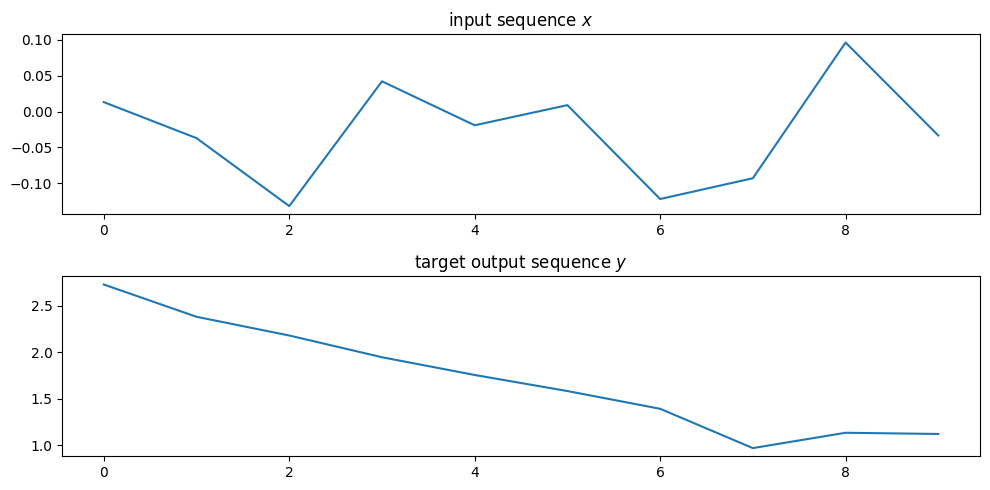

In [6]:
###构造数据，x为给定输入序列，y为想要rnn给出的输出序列，序列长度为T
T = 10
x = bm.random.normal(0,0.1,size=(T,))
y = bm.exp(bm.linspace(1,0,T)) + bm.random.normal(0,0.1,size=(T,))
y0 = y[0]

###可视化输入与输出
plt.figure(figsize=(T,5))
plt.subplot(2,1,1)
plt.plot(bm.arange(T),x)
plt.title('input sequence $x$')
plt.subplot(2,1,2)
plt.plot(bm.arange(T),y)
plt.title('target output sequence $y$')
plt.tight_layout() 
plt.show()



## Question: 补全以下代码的update函数与train函数，实现RNN的Real time recurrent learning  

训练前

  0%|          | 0/10 [00:00<?, ?it/s]

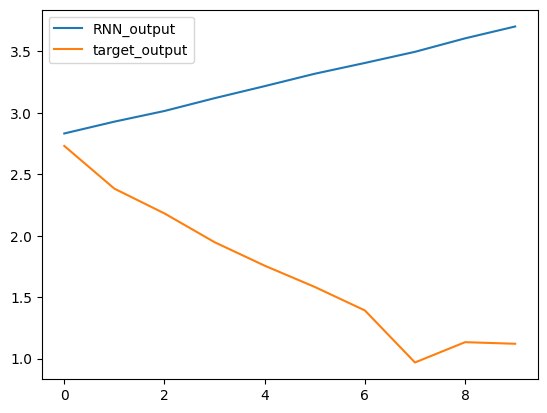

In [7]:
class RNN(bp.DynamicalSystemNS):
    def __init__(self,dt=bm.dt):
        super(RNN, self).__init__(name=None)

        self.r = bm.Variable(bm.zeros(1))
        self.pw = bm.Variable(bm.zeros(1))
        self.pb = bm.Variable(bm.zeros(1))
        
        self.w = bm.Variable(bm.ones(1))
        self.b = bm.Variable(bm.ones(1))
        self.dt = dt

    def reset_neuron(self,y0):
        self.r = bm.Variable(bm.ones(1)*y0)
        self.pw[0].value = 0
        self.pb[0].value = 0

    def update(self,x):
        dr = ((self.w-1)*self.r + self.b + x)*self.dt
        self.r.value = self.r + dr
        
        # 这两行需要写出p_w的计算细节
        #
        
        dpb = ((self.w-1)*self.pb + 1)*self.dt
        self.pb.value = self.pb + dpb   
    
    def train(self,r_seq,pw_seq,pb_seq,y):
        eta = 0.1
        
        #写出dw的更新法则
        self.w.value = self.w + dw
        
        #写出db的更新法则
        self.b.value = self.b + db
        return bm.mean(bm.square((r_seq-y)))/2,dw,db
    
        
rnn = RNN()
rnn.reset_neuron(y0)
runner = bp.DSRunner(rnn, monitors=['r'])
runner.run(inputs = x)
plt.plot(bm.arange(T), bm.squeeze(runner.mon.r),label = 'RNN_output')
plt.plot(bm.arange(T),y,label = 'target_output')
plt.legend()
plt.show()


训练后

In [8]:
for epoch in range(10):
    rnn.reset_neuron(y0)
    runner = bp.DSRunner(rnn, monitors=['r','pw','pb'])
    runner.run(inputs = x)  
    loss,dw,db = rnn.train(bm.squeeze(runner.mon.r),bm.squeeze(runner.mon.pw),bm.squeeze(runner.mon.pb),y)
    print('epoch',epoch,':loss=',loss,dw,db,'w=',rnn.w,)

rnn.reset_neuron(y0)
runner = bp.DSRunner(rnn, monitors=['r'])
runner.run(inputs = x)
plt.plot(bm.arange(T), bm.squeeze(runner.mon.r),label = 'RNN_output')
plt.plot(bm.arange(T),y,label = 'target_output')
plt.legend()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'dw' is not defined

## Answer

训练前

  0%|          | 0/10 [00:00<?, ?it/s]

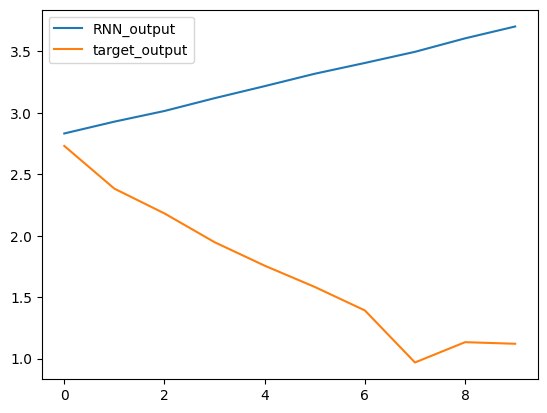

In [9]:
class RNN(bp.DynamicalSystemNS):
    def __init__(self,dt=bm.dt):
        super(RNN, self).__init__(name=None)

        self.r = bm.Variable(bm.zeros(1))
        self.pw = bm.Variable(bm.zeros(1))
        self.pb = bm.Variable(bm.zeros(1))
        
        self.w = bm.Variable(bm.ones(1))
        self.b = bm.Variable(bm.ones(1))
        self.dt = dt

    def reset_neuron(self,y0):
        self.r = bm.Variable(bm.ones(1)*y0)
        self.pw[0].value = 0
        self.pb[0].value = 0

    def update(self,x):
        dr = ((self.w-1)*self.r + self.b + x)*self.dt
        self.r.value = self.r + dr
        
        dpw = ((self.w-1)*self.pw + self.r)*self.dt
        self.pw.value = self.pw + dpw   
        
        dpb = ((self.w-1)*self.pb + 1)*self.dt
        self.pb.value = self.pb + dpb   
    
    def train(self,r_seq,pw_seq,pb_seq,y):
        eta = 0.1
        dw = -eta*bm.mean((r_seq-y)*pw_seq)
        self.w.value = self.w + dw
        db = -eta*bm.mean((r_seq-y)*pb_seq)
        self.b.value = self.b + db
        return bm.mean(bm.square((r_seq-y)))/2,dw,db
    
        
rnn = RNN()
rnn.reset_neuron(y0)
runner = bp.DSRunner(rnn, monitors=['r'])
runner.run(inputs = x)
plt.plot(bm.arange(T), bm.squeeze(runner.mon.r),label = 'RNN_output')
plt.plot(bm.arange(T),y,label = 'target_output')
plt.legend()
plt.show()


训练后

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 0 :loss= 1.5387979 -0.8472827 -0.2630562 w= Variable(value=Array([0.15271729]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1 :loss= 0.08542997 -0.1447589 -0.050913583 w= Variable(value=Array([0.0079584]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 2 :loss= 0.034823027 -0.04382294 -0.019255448 w= Variable(value=Array([-0.03586454]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 3 :loss= 0.025428955 -0.022789469 -0.011667719 w= Variable(value=Array([-0.05865401]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 4 :loss= 0.021513855 -0.015477674 -0.0085375635 w= Variable(value=Array([-0.07413168]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 5 :loss= 0.019242588 -0.011734429 -0.006706368 w= Variable(value=Array([-0.08586611]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 6 :loss= 0.01773631 -0.009285289 -0.0054204394 w= Variable(value=Array([-0.09515139]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 7 :loss= 0.016677232 -0.00748206 -0.0044423807 w= Variable(value=Array([-0.10263345]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 8 :loss= 0.015908714 -0.006086025 -0.0036725134 w= Variable(value=Array([-0.10871948]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 9 :loss= 0.01533889 -0.004979941 -0.0030560873 w= Variable(value=Array([-0.11369941]), dtype=float32)


  0%|          | 0/10 [00:00<?, ?it/s]

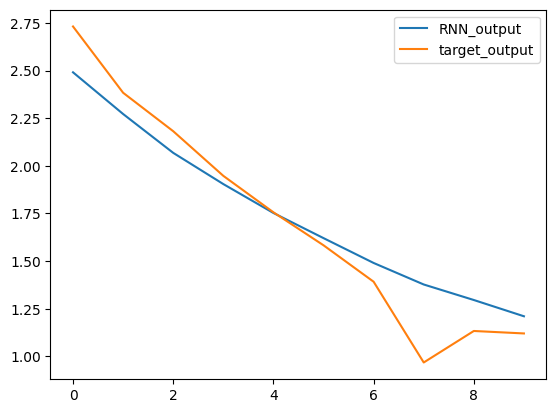

In [10]:
for epoch in range(10):
    rnn.reset_neuron(y0)
    runner = bp.DSRunner(rnn, monitors=['r','pw','pb'])
    runner.run(inputs = x)  
    loss,dw,db = rnn.train(bm.squeeze(runner.mon.r),bm.squeeze(runner.mon.pw),bm.squeeze(runner.mon.pb),y)
    print('epoch',epoch,':loss=',loss,dw,db,'w=',rnn.w,)

rnn.reset_neuron(y0)
runner = bp.DSRunner(rnn, monitors=['r'])
runner.run(inputs = x)
plt.plot(bm.arange(T), bm.squeeze(runner.mon.r),label = 'RNN_output')
plt.plot(bm.arange(T),y,label = 'target_output')
plt.legend()
plt.show()